In [ ]:
import pandas as pd;
import numpy as np;

from google.colab import drive
drive.mount('/content/drive')
import tensorflow as tf
tf.test.gpu_device_name() # if using gpu

Mounted at /content/drive


'/device:GPU:0'

In [ ]:
train_path = "drive/My Drive/training.csv"
train  = pd.read_csv(train_path)


In [ ]:
train

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,67.402546,31.842551,29.746749,38.632942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.265961,67.029093,NaN,NaN,NaN,NaN,NaN,NaN,50.426637,79.683921,71 74 85 105 116 128 139 150 170 187 201 209 2...
7045,66.134400,38.365501,30.478626,39.950198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.910346,66.626011,NaN,NaN,NaN,NaN,NaN,NaN,50.287397,77.983023,60 60 62 57 55 51 49 48 50 53 56 56 106 89 77 ...
7046,66.690732,36.845221,31.666420,39.685042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.462572,67.515161,NaN,NaN,NaN,NaN,NaN,NaN,49.462572,78.117120,74 74 74 78 79 79 79 81 77 78 80 73 72 81 77 1...
7047,70.965082,39.853666,30.543285,40.772339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.754202,66.724988,NaN,NaN,NaN,NaN,NaN,NaN,50.065186,79.586447,254 254 254 254 254 238 193 145 121 118 119 10...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
len(train["Image"][0].split())

9216

In [ ]:
train['Image'].isna().value_counts()
# So no row in image column has null values

False    7049
Name: Image, dtype: int64

In [ ]:
train.isnull().sum()
# we have so many nan values
# we can't fill drop these values
# so we will fill these values with the mean

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [ ]:
train.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,2268.000000,2268.000000,2270.000000,2270.000000,2225.000000,2225.000000,2270.000000,2270.000000,2236.000000,2236.000000,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,22.384504,38.033495,56.068513,29.332678,79.482826,29.734861,39.322137,29.502998,15.871177,30.428166,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,3.057122,2.910368,3.485485,3.078134,3.986224,3.773744,3.209641,3.106869,3.622533,3.865772,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,3.980117,25.123828,17.888717,15.859361,32.206432,10.522325,6.921014,16.476000,3.826243,13.224453,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,20.585808,36.534382,54.515587,27.617244,77.673916,27.667948,37.552286,27.790607,13.562183,28.206046,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,22.535954,37.867071,56.244975,29.528872,79.784229,29.773813,39.298848,29.569347,15.785709,30.320160,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,24.237701,39.415051,57.946415,31.158830,81.590720,31.835621,40.917160,31.251664,17.999040,32.654768,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,61.428580,70.746797,79.787831,60.875896,94.269957,60.500298,76.582388,62.083177,58.418216,66.751329,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [ ]:
labels = train.columns[0:len(train.columns)-1]
for i in labels:
    train[i].fillna(train[i].mean(), inplace = True)
train.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,22.384504,38.033495,56.068513,29.332678,79.482826,29.734861,39.322137,29.502998,15.871177,30.428166,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.445786,3.150688,3.080385,3.030822,1.526825,1.309453,1.931180,1.633828,1.332939,1.311183,1.733826,1.650596,1.977641,1.746513,2.239217,2.119858,1.821129,1.762817,2.039944,2.176918,4.280038,5.720567,2.313924,2.597932,2.249461,2.506639,1.887559,2.966475,4.259953,5.395169
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,3.980117,25.123828,17.888717,15.859361,32.206432,10.522325,6.921014,16.476000,3.826243,13.224453,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.084235,35.906648,28.788000,36.329459,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,22.384504,38.033495,56.068513,29.332678,79.482826,29.734861,39.322137,29.502998,15.871177,30.428166,46.602370,59.292697,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,46.584000,75.567671
50%,66.492983,37.531396,30.260706,37.818074,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,22.384504,38.033495,56.068513,29.332678,79.482826,29.734861,39.322137,29.502998,15.871177,30.428166,48.424713,63.451421,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.570252,78.728774
75%,68.024349,39.254400,31.767416,39.562527,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,22.384504,38.033495,56.068513,29.332678,79.482826,29.734861,39.322137,29.502998,15.871177,30.428166,50.330437,66.492686,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,50.662249,82.222604
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,61.428580,70.746797,79.787831,60.875896,94.269957,60.500298,76.582388,62.083177,58.418216,66.751329,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [ ]:
images = [];
rows = len(train)
for i in range(rows) :
    image_points = train["Image"][i].split()
    for i in range(len(image_points)) :
        image_points[i] = (int)(image_points[i]);
    images.append(image_points)
images = np.array(images)
images[0]

array([238, 236, 237, ...,  70,  75,  90])

In [ ]:
s =set()
for rows in images :
    s.add(len(rows))
s
# to check if all the images have 9216 rows


{9216}

In [ ]:
images = images.reshape(len(images), 96,96,1) # could have also used images.reshape(-1, 96,96,1)
# -1 basically indicates pyhon to find the corret dimension of that entry
images.shape

(7049, 96, 96, 1)

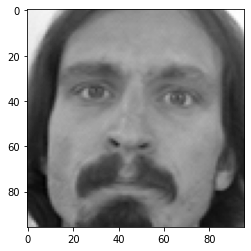

In [ ]:
# plotting the first image
import matplotlib.pyplot as plt;
plt.imshow(images[0].reshape(96,96), cmap = 'gray')

In [ ]:
# getting the training data
X_train = images
Y_train  = train[[col for col in labels]]
Y_train

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,67.402546,31.842551,29.746749,38.632942,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,22.384504,38.033495,56.068513,29.332678,79.482826,29.734861,39.322137,29.502998,15.871177,30.428166,48.265961,67.029093,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,50.426637,79.683921
7045,66.134400,38.365501,30.478626,39.950198,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,22.384504,38.033495,56.068513,29.332678,79.482826,29.734861,39.322137,29.502998,15.871177,30.428166,47.910346,66.626011,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,50.287397,77.983023
7046,66.690732,36.845221,31.666420,39.685042,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,22.384504,38.033495,56.068513,29.332678,79.482826,29.734861,39.322137,29.502998,15.871177,30.428166,49.462572,67.515161,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,49.462572,78.117120
7047,70.965082,39.853666,30.543285,40.772339,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,22.384504,38.033495,56.068513,29.332678,79.482826,29.734861,39.322137,29.502998,15.871177,30.428166,50.754202,66.724988,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,50.065186,79.586447


In [ ]:
# Normalizing the data

In [ ]:
# Normalizing the data
# The X_train values lie between 0-255;
# divide the x_train by 255
# we are given the image is of size 96 * 96
# so the landmark co-urdinates cannot have length beyond length 96 and breadth 96 as these would be the edges
# hence we will  divide Y_train  by 96
X_train = images/255
    #Y_train  = train[[col for col in labels]].values / 96
from sklearn.preprocessing import MinMaxScaler;
from sklearn.preprocessing import StandardScaler;
# mms = MinMaxScaler(feature_range = (0,1));
#Y_train = mms.fit_transform(train[[col for col in labels]].values)

sc = StandardScaler();
Y_train = sc.fit_transform(train[[col for col in labels]].values) 
X_train[0], Y_train[0],

(array([[[0.93333333],
         [0.9254902 ],
         [0.92941176],
         ...,
         [0.98039216],
         [0.98039216],
         [0.98039216]],
 
        [[0.92156863],
         [0.93333333],
         [0.9254902 ],
         ...,
         [0.97647059],
         [0.98039216],
         [0.98431373]],
 
        [[0.92941176],
         [0.9254902 ],
         [0.92941176],
         ...,
         [0.98431373],
         [0.98431373],
         [0.98039216]],
 
        ...,
 
        [[0.72941176],
         [0.71764706],
         [0.70980392],
         ...,
         [0.20392157],
         [0.22352941],
         [0.23529412]],
 
        [[0.74117647],
         [0.7372549 ],
         [0.81176471],
         ...,
         [0.23921569],
         [0.27058824],
         [0.30588235]],
 
        [[0.74901961],
         [0.72156863],
         [0.72156863],
         ...,
         [0.2745098 ],
         [0.29411765],
         [0.35294118]]]),
 array([-0.09445752,  0.42883816, -0.02567848, -0.51318

In [ ]:
# testing data
test_path = "drive/My Drive/test.csv"
test  = pd.read_csv(test_path)
test

# covertunv im age row into array
images_test= [];
rows = len(test)
for i in range(rows) :
    image_test_points = test["Image"][i].split()
    for i in range(len(image_test_points)) :
        image_test_points[i] = (int)(image_test_points[i]);
    images_test.append(image_test_points)
images_test = np.array(images_test)
images_test[0]

images_test = images_test.reshape(-1, 96,96,1) # could have also used images.reshape(-1, 96,96,1)
# -1 basically indicates pyhon to find the corret dimension of that entry
images_test.shape

X_test = images_test
id = test["ImageId"].values



# Building The network

In [ ]:
# the basic structure of a CNN 
# input layers
# Convolution Layers, Maxpooling Layers, Dense Layers
# output

# compile

In [ ]:
import tensorflow
import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, BatchNormalization, Flatten, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping

es =  EarlyStopping(monitor = "val_mse", patience  = 6, min_delta = 0.001, verbose = 1) # to keep an eye on val_mse, tdthe value doesn't change by atleast 0.001 after 3 epochs stop
# hyper parameters
epochs = 200
batch_size = 100
validation_split = 0.2
kernel_size = (3,3)
strides = (1,1)
pool_size = (2,2)
number_of_classes = 30
padding  = 'valid';

# the model
model =  Sequential()

input_shape = (96,96,1)


model.add(Conv2D(16, kernel_size = kernel_size, strides = strides, input_shape = input_shape, activation = 'relu',padding = 'same',name ="Conv-1"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = pool_size, padding = 'same',name ="MaxPooling-1"))

model.add(Conv2D(32, kernel_size = kernel_size, strides = strides, input_shape = input_shape, activation = 'relu',padding = 'same',name ="Conv0"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = pool_size, padding = 'same',name ="MaxPooling0"))

model.add(Conv2D(64, kernel_size = kernel_size, strides = strides, input_shape = input_shape, activation = 'relu',padding = 'same',name ="Conv1"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = pool_size, padding = 'same',name ="MaxPooling1"))

model.add(Conv2D(128, kernel_size = kernel_size, strides = strides, input_shape = input_shape, activation = 'relu',padding = 'same',name ="Conv2"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = pool_size, padding = 'same',name ="MaxPooling2"))



model.add(Conv2D(256, kernel_size = kernel_size, strides = strides, input_shape = input_shape, activation = 'relu',padding = 'same',name ="Conv3"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = pool_size, padding = 'same',name ="MaxPooling3"))

model.add(Conv2D(512, kernel_size = kernel_size, strides = strides, input_shape = input_shape, activation = 'relu',padding = 'same',name ="Conv4"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = pool_size, padding = 'same',name ="MaxPooling4"))


model.add(Flatten());
model.add(Dense(16, activation = 'relu',name ="Dense-1"))
model.add(Dense(32, activation = 'relu',name ="Dense0"))
model.add(Dense(64, activation = 'relu',name ="Dense1"))
model.add(Dense(128, activation = 'relu',name ="Dense2"))
model.add(Dense(256, activation = 'relu',name ="Dense3"))
model.add(Dense(512, activation = 'relu',name ="Dense4"))


opt = tf.keras.optimizers.Adam(learning_rate=0.00000000001) # making the learning rate this low helped me really reduce the val_mse
#sgd = tf.keras.optimizers.SGD(lr=0.000000000001, decay=1e-6, momentum=0.95, nesterov=True)

model.add(Dense(number_of_classes, name = "Final")) # no need to add activation softmax fror the final layer as output is continous
model.summary()
model.compile(loss = "categorical_crossentropy",optimizer = opt, metrics =["mse"])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv-1 (Conv2D)              (None, 96, 96, 16)        160       
_________________________________________________________________
batch_normalization_22 (Batc (None, 96, 96, 16)        64        
_________________________________________________________________
MaxPooling-1 (MaxPooling2D)  (None, 48, 48, 16)        0         
_________________________________________________________________
Conv0 (Conv2D)               (None, 48, 48, 32)        4640      
_________________________________________________________________
batch_normalization_23 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
MaxPooling0 (MaxPooling2D)   (None, 24, 24, 32)        0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 24, 24, 64)       

In [ ]:
history = model.fit(X_train, Y_train ,epochs = epochs, validation_split = validation_split, batch_size = batch_size, shuffle = True) # add callbacks = [es]


Epoch 1/200
57/57 [==============================] - 2s 32ms/step - loss: -2.6128 - mse: 1.2250 - val_loss: 12.9784 - val_mse: 0.2726
Epoch 2/200
57/57 [==============================] - 2s 27ms/step - loss: -2.4458 - mse: 1.2248 - val_loss: 11.8525 - val_mse: 0.2761
Epoch 3/200
57/57 [==============================] - 2s 27ms/step - loss: -2.6420 - mse: 1.2251 - val_loss: 10.1864 - val_mse: 0.2799
Epoch 4/200
57/57 [==============================] - 2s 28ms/step - loss: -2.7328 - mse: 1.2249 - val_loss: 10.1858 - val_mse: 0.2847
Epoch 5/200
57/57 [==============================] - 2s 27ms/step - loss: -2.4760 - mse: 1.2253 - val_loss: 10.6190 - val_mse: 0.2919
Epoch 6/200
57/57 [==============================] - 2s 27ms/step - loss: -2.3723 - mse: 1.2250 - val_loss: 10.8802 - val_mse: 0.2998
Epoch 7/200
57/57 [==============================] - 2s 27ms/step - loss: -2.3920 - mse: 1.2250 - val_loss: 11.0305 - val_mse: 0.3068
Epoch 8/200
57/57 [==============================] - 2s 27ms/s

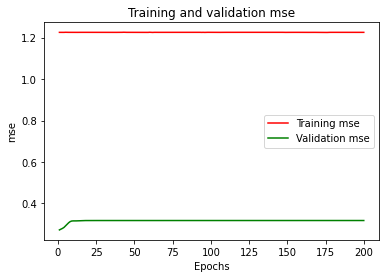

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['mse']
val_loss = history.history['val_mse']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training mse')
plt.plot(epochs, val_loss, color='green', label='Validation mse')
plt.title('Training and validation mse')
plt.xlabel('Epochs')
plt.ylabel('mse')
plt.legend()
plt.show()


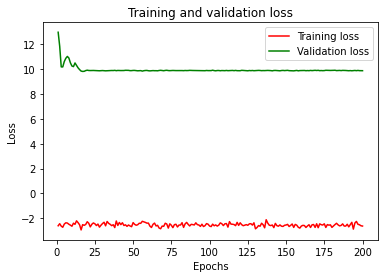

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# making the predictions
X_test = images_test/255 # to normalize testing images
Y_test = model.predict(X_test);
Y_predict  = sc.inverse_transform(Y_test)
Y_predict

array([[65.97797 , 37.930096, 30.312193, ..., 73.95232 , 48.104862,
        78.29367 ],
       [66.40812 , 37.242317, 30.441252, ..., 73.88807 , 48.006927,
        78.207   ],
       [66.07224 , 37.848377, 30.250782, ..., 73.88643 , 48.204956,
        77.998   ],
       ...,
       [66.56248 , 37.167225, 30.384203, ..., 73.861   , 47.446842,
        78.63086 ],
       [65.969986, 37.721134, 30.337807, ..., 73.97639 , 47.618496,
        78.38516 ],
       [66.597496, 37.264687, 30.292082, ..., 74.067795, 47.18217 ,
        78.429245]], dtype=float32)

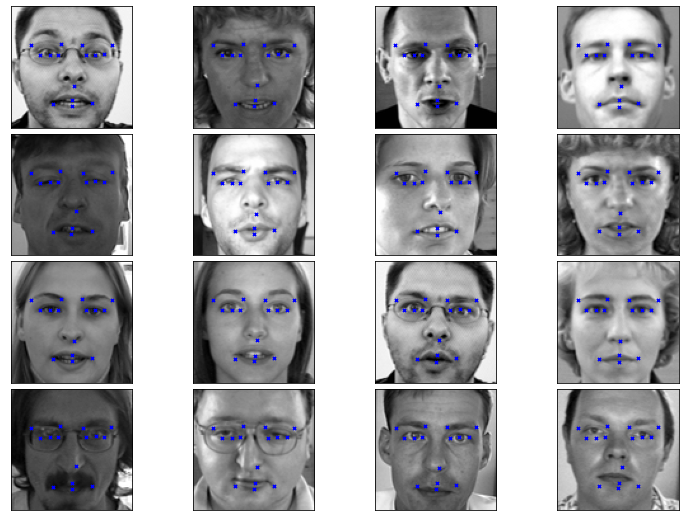

In [ ]:
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2], y[1::2], marker='x', s=10,c='blue')
    #axis.scatter(y[1::2], y[1::2], marker='x', s=10,c='red')


fig = plt.figure(figsize=(10, 7))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    axis = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    plot_sample(X_test[i], Y_predict[i], axis)

plt.show()

In [ ]:
lookup = pd.read_csv("drive/My Drive/IdLookupTable.csv");
lookup

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN
...,...,...,...,...
27119,27120,1783,right_eye_center_y,NaN
27120,27121,1783,nose_tip_x,NaN
27121,27122,1783,nose_tip_y,NaN
27122,27123,1783,mouth_center_bottom_lip_x,NaN


In [ ]:
location = [];
labels = list(labels)
ImageId = lookup["ImageId"];
FeatureName = lookup["FeatureName"];


for i in range(len(lookup)) :
  im = Y_predict[ImageId[i]-1] # to get the required imag, whose points need to be found, index  of an image is ImageID -1
  index = labels.index(FeatureName[i]) # to get the index of feature from the list of labels
  location.append(im[index])
#location

In [ ]:
len(location)

27124

In [ ]:
RowId = lookup["RowId"]
predictions = pd.DataFrame( {"RowId" :RowId, "Location":location})

# to make a data frame
predictions[(predictions.Location > 96) | (predictions.Location < 0) ] # to see how many locations do we get wrong

,RowId,Location


In [ ]:

def f(s) :
  if(s > 96) :
    return 96;
  elif s < 0 :
    return 0;
  return s
predictions["Location"]  = predictions["Location"].apply(f)
predictions

,RowId,Location
0,1,65.977966
1,2,37.930096
2,3,30.312193
3,4,38.165909
4,5,58.920624
...,...,...
27119,27120,37.780312
27120,27121,50.725941
27121,27122,60.692417
27122,27123,47.182171


In [ ]:
predictions.to_csv("FaceKeyPointsPredictions.csv", index = False)
from google.colab import files
files.download("FaceKeyPointsPredictions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
file = model.save(os.path.join("./dnn","facial_key_features_model.h5")) # save the network of  as a h5


OSError: ignored

In [ ]:
Y_predict[0::2]

array([[65.97797 , 37.930096, 30.312193, ..., 73.95232 , 48.104862,
        78.29367 ],
       [66.07224 , 37.848377, 30.250782, ..., 73.88643 , 48.204956,
        77.998   ],
       [66.47692 , 36.719837, 30.227222, ..., 74.15617 , 46.841545,
        78.50978 ],
       ...,
       [66.25852 , 37.6226  , 30.171675, ..., 75.33943 , 47.006523,
        78.27164 ],
       [66.56248 , 37.167225, 30.384203, ..., 73.861   , 47.446842,
        78.63086 ],
       [66.597496, 37.264687, 30.292082, ..., 74.067795, 47.18217 ,
        78.429245]], dtype=float32)

In [ ]:
y =[2,4,6]
y[1::2]

[4]